In [ ]:
%matplotlib inline


# K-means Clustering


The plots display firstly what a K-means algorithm would yield
using three clusters. It is then shown what the effect of a bad
initialization is on the classification process:
By setting n_init to only 1 (default is 10), the amount of
times that the algorithm will be run with different centroid
seeds is reduced.
The next plot displays what using eight clusters would deliver
and finally the ground truth.




In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
type(iris.data)

numpy.ndarray

In [4]:
X = iris.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
y = iris.target
y[:5]

array([0, 0, 0, 0, 0])

In [7]:
import numpy as np
np.unique(y)

array([0, 1, 2])

In [8]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [10]:
# we are kind of cheating since we know that we have 3 groups (classes,clusters etc)
# Kmeans works best when we know the divisions
estimator = KMeans(n_clusters=3)

In [11]:
# we only have input features(columns), we do not have answers in the clustering tasks
estimator.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
estimator.labels_[:5]

array([0, 0, 0, 0, 0])

In [13]:
estimator.labels_[-5:]

array([2, 1, 2, 2, 1])

In [14]:
estimator.labels_[95:105]

array([1, 1, 1, 1, 1, 2, 1, 2, 2, 2])

In [15]:
y[95:105]

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [16]:
# since our answer indexes match
# we can genererate truth table checking for mismatches
isMatch = estimator.labels_ == y

In [17]:
isMatch[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [20]:
isMatch[95:105]

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True])

In [18]:
isMatch.sum() # we see that there are 16 False answers

134

In [19]:
len(isMatch)

150

In [23]:
notMatch = np.logical_not(isMatch)

In [24]:
notMatch.nonzero()

(array([ 52,  77, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138,
        142, 146, 149], dtype=int64),)

Automatically created module for IPython interactive environment


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


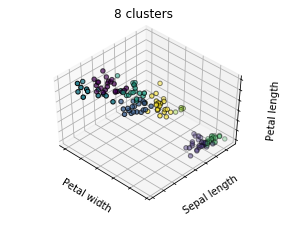

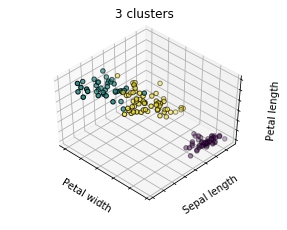

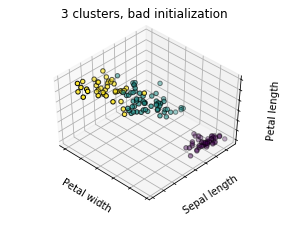

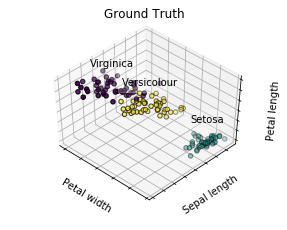

In [25]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause



np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

In [26]:
randomdata = np.random.randint(11,15, 100) + np.random.random(100)*0.1
randomdata[:5]

array([11.03250054, 12.05040387, 12.09275683, 11.00323083, 13.00835199])

In [27]:
est = KMeans(n_clusters=4)

In [28]:
est.fit(randomdata)

ValueError: Expected 2D array, got 1D array instead:
array=[11.03250054 12.05040387 12.09275683 11.00323083 13.00835199 14.02050151
 12.09808905 13.04405617 11.0008499  14.06538889 12.03724029 14.0259196
 13.01026635 11.07168035 14.03851859 11.03880382 11.08294278 12.02742022
 11.08526686 12.09943111 11.09354158 13.07359205 12.03403812 14.06145076
 14.07198026 14.09867734 11.08547457 11.0987061  13.09554505 12.09039312
 13.04566994 11.01575594 13.06404197 13.06571982 11.04616034 14.01086145
 11.00912685 12.05488357 11.09570511 14.04309138 12.01371246 13.03293889
 11.01891025 14.03812015 12.00937394 11.05938665 14.0957942  12.07755521
 14.04707233 13.0161291  14.06512692 11.0429361  11.00877765 14.02621557
 12.06484106 13.01670134 13.07424971 12.09814286 13.02612227 13.04508638
 13.05093878 12.0441307  14.09683468 13.08890065 12.08125358 13.0738174
 13.01354395 14.02324162 11.00047031 12.01061519 13.089744   14.05840106
 11.01215687 13.06507371 13.03120466 14.082711   12.01808324 14.03020529
 11.09436948 11.05592625 13.07681056 12.03403591 12.04891011 11.01175583
 14.03383421 12.04526487 11.02302138 11.09292459 11.08383172 11.0394634
 12.00704777 13.0943096  11.09029723 11.08404583 13.03422855 11.08589984
 14.01352908 14.00356111 14.09627267 13.01065072].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# estimator wants to see something like for 1 dimensional data
[[1],[3],[5]]

In [29]:
randomprepared = randomdata.reshape(-1,1)
randomprepared[:5]

array([[11.03250054],
       [12.05040387],
       [12.09275683],
       [11.00323083],
       [13.00835199]])

In [30]:
est.fit(randomprepared)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
est.labels_[:10]

array([2, 0, 0, 2, 3, 1, 0, 3, 2, 1])

In [32]:
randomdata[:10]

array([11.03250054, 12.05040387, 12.09275683, 11.00323083, 13.00835199,
       14.02050151, 12.09808905, 13.04405617, 11.0008499 , 14.06538889])

In [37]:
est.predict([[11.06],[14.7],[10.5],[11.6]])

array([2, 1, 2, 0])

In [38]:
from sklearn.cluster import SpectralClustering

In [39]:
specest = SpectralClustering(n_clusters=4)

In [40]:
specest.fit(randomprepared)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=4, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=None)

In [41]:
specest.labels_[:10]

array([2, 0, 0, 2, 1, 3, 0, 1, 2, 3])

In [42]:
est.labels_[:10]

array([2, 0, 0, 2, 3, 1, 0, 3, 2, 1])

In [44]:
from sklearn.cluster import MeanShift


In [45]:
meanest = MeanShift()

In [46]:
meanest.fit(randomprepared)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [47]:
meanest.labels_[:10]

array([0, 3, 3, 0, 1, 2, 3, 1, 0, 2], dtype=int64)

In [48]:
np.unique(meanest.labels_)

array([0, 1, 2, 3], dtype=int64)